In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
raw_db= pd.read_csv('General_Education_School.csv')
raw_db.head(5)

,DBN,School Name,School Type,Parent Response Rate,Teacher Response Rate,Student Response Rate,Total Safety and Respect Score,Total Communication Score,Total Engagement Score,Total Academic Expectations Score
0,dbn,locationname,NaN,rr_p,rr_t,rr_s,saf_tot_12,com_tot_12,eng_tot_12,aca_tot_12
1,01M015,P.S. 015 Roberto Clemente,Elementary School,61%,92%,NaN,8.4,8.2,8.3,8.2
2,01M019,P.S. 019 Asher Levy,Elementary School,92%,94%,NaN,8.4,8,8,8.2
3,01M020,P.S. 020 Anna Silver,Elementary School,88%,73%,NaN,8.5,7.8,8.2,8.2
4,01M034,P.S. 034 Franklin D. Roosevelt,Elementary/Middle School,39%,58%,96%,7.3,6.9,7.3,7.7


In [61]:
db = raw_db
db.head(5)

,DBN,School Name,School Type,Parent Response Rate,Teacher Response Rate,Student Response Rate,Total Safety and Respect Score,Total Communication Score,Total Engagement Score,Total Academic Expectations Score
0,dbn,locationname,NaN,rr_p,rr_t,rr_s,saf_tot_12,com_tot_12,eng_tot_12,aca_tot_12
1,01M015,P.S. 015 Roberto Clemente,Elementary School,61%,92%,NaN,8.4,8.2,8.3,8.2
2,01M019,P.S. 019 Asher Levy,Elementary School,92%,94%,NaN,8.4,8,8,8.2
3,01M020,P.S. 020 Anna Silver,Elementary School,88%,73%,NaN,8.5,7.8,8.2,8.2
4,01M034,P.S. 034 Franklin D. Roosevelt,Elementary/Middle School,39%,58%,96%,7.3,6.9,7.3,7.7


number of rows and columns, types of the columns

In [64]:
db.shape

(1671, 10)

In [66]:
db.dtypes

DBN                                  object
School Name                          object
School Type                          object
Parent Response Rate                 object
Teacher Response Rate                object
Student Response Rate                object
Total Safety and Respect Score       object
Total Communication Score            object
Total Engagement Score               object
Total Academic Expectations Score    object
dtype: object

I'm storing the first row then dropping it so it won't affect the other numerical values in the same column

In [71]:
first_row = db.iloc[0]
db = db.iloc[1:].reset_index(drop=True)
db.head(2)

,DBN,School Name,School Type,Parent Response Rate,Teacher Response Rate,Student Response Rate,Total Safety and Respect Score,Total Communication Score,Total Engagement Score,Total Academic Expectations Score
0,01M015,P.S. 015 Roberto Clemente,Elementary School,61%,92%,NaN,8.4,8.2,8.3,8.2
1,01M019,P.S. 019 Asher Levy,Elementary School,92%,94%,NaN,8.4,8,8,8.2


In [194]:
db.isnull().sum()

DBN                                    0
School Name                            0
School Type                            0
Parent Response Rate                   0
Teacher Response Rate                  0
Student Response Rate                589
Total Safety and Respect Score         0
Total Communication Score              0
Total Engagement Score                 0
Total Academic Expectations Score      0
dtype: int64

make the rates and scores as floats instead of strings

In [74]:
columns = [
    'Parent Response Rate',
    'Teacher Response Rate',
    'Student Response Rate',
    'Total Safety and Respect Score',
    'Total Communication Score',
    'Total Engagement Score',
    'Total Academic Expectations Score'
]

for col in columns:
    db[col] = db[col].astype(str).str.replace('%', '').str.strip()
    db[col] = pd.to_numeric(db[col], errors='coerce')

In [76]:
db.dtypes

DBN                                   object
School Name                           object
School Type                           object
Parent Response Rate                   int64
Teacher Response Rate                  int64
Student Response Rate                float64
Total Safety and Respect Score       float64
Total Communication Score            float64
Total Engagement Score               float64
Total Academic Expectations Score    float64
dtype: object

how mant schools participated in each type

In [79]:
print("Number of schools per type:")
print(db["School Type"].value_counts().sort_index())

Number of schools per type:
School Type
Early Childhood School            83
Elementary School                617
Elementary/Middle School         160
Elementary/Middle/High School      7
High School                      352
Middle School                    293
Middle/High School                87
Transfer High School              49
YABC                              22
Name: count, dtype: int64


number of nan values in each school type

In [82]:
nan_count = db.groupby("School Type")["Student Response Rate"].apply(lambda x: x.isna().sum())
print("NaN values in Students Response Rate per School Type:")
print(nan_count)

NaN values in Students Response Rate per School Type:
School Type
Early Childhood School            83
Elementary School                589
Elementary/Middle School           0
Elementary/Middle/High School      0
High School                        0
Middle School                      3
Middle/High School                 0
Transfer High School               0
YABC                               0
Name: Student Response Rate, dtype: int64


In [84]:
student_response = db.groupby("School Type")["Student Response Rate"].agg(["mean", "std"]).dropna()
student_response = student_response.sort_values("mean", ascending=False)
student_response

,mean,std
School Type,,
Elementary School,94.642857,18.789702
Elementary/Middle School,93.762500,8.502673
Elementary/Middle/High School,91.571429,6.133437
Middle School,91.241379,9.347039
Middle/High School,83.965517,13.994557
High School,77.494318,17.017838
Transfer High School,68.102041,18.443884
YABC,65.863636,20.744008


reorder the database based on school types

In [87]:
db.sort_values(by="School Type").reset_index(drop=True)

,DBN,School Name,School Type,Parent Response Rate,Teacher Response Rate,Student Response Rate,Total Safety and Respect Score,Total Communication Score,Total Engagement Score,Total Academic Expectations Score
0,84M483,New York French American Charter School,Early Childhood School,50,62,NaN,7.1,6.4,5.9,6.1
1,03M185,P.S. 185 - The Early Childhood Discovery And D...,Early Childhood School,90,100,NaN,8.7,8.0,8.3,8.4
2,29Q251,P.S. 251 Queens,Early Childhood School,85,96,NaN,7.6,7.1,7.3,7.5
3,24Q007,P.S. 007 Louis F. Simeone,Early Childhood School,55,73,NaN,7.9,6.5,6.5,6.8
4,09X170,P.S. 170,Early Childhood School,80,86,NaN,9.5,8.7,9.0,9.2
...,...,...,...,...,...,...,...,...,...,...
1665,24Q457,Hs Arts & Business Yabc,YABC,27,61,54.0,8.7,7.7,8.4,8.6
1666,18K922,South Shore Educational Complex Yabc,YABC,32,41,44.0,8.5,7.9,8.2,8.4
1667,31R607,Staten Island Yabc,YABC,11,100,95.0,8.2,7.4,8.0,8.1
1668,02M473,Washington Irving Yabc,YABC,1,69,41.0,8.2,7.2,8.0,8.3


All the early childhood schools student's response rate is nan (It's totally okay) I'll fill them with 0

In [104]:
db.loc[db["School Type"] == "Early Childhood School", "Student Response Rate"] =db.loc[db["School Type"] == "Early Childhood School", "Student Response Rate"].fillna(0)

In [106]:
db

,DBN,School Name,School Type,Parent Response Rate,Teacher Response Rate,Student Response Rate,Total Safety and Respect Score,Total Communication Score,Total Engagement Score,Total Academic Expectations Score
0,01M015,P.S. 015 Roberto Clemente,Elementary School,61,92,NaN,8.4,8.2,8.3,8.2
1,01M019,P.S. 019 Asher Levy,Elementary School,92,94,NaN,8.4,8.0,8.0,8.2
2,01M020,P.S. 020 Anna Silver,Elementary School,88,73,NaN,8.5,7.8,8.2,8.2
3,01M034,P.S. 034 Franklin D. Roosevelt,Elementary/Middle School,39,58,96.0,7.3,6.9,7.3,7.7
4,01M063,P.S. 063 William Mckinley,Elementary School,58,100,NaN,8.5,7.4,7.6,7.8
...,...,...,...,...,...,...,...,...,...,...
1665,84X718,Bronx Charter School For Better Learning,Elementary School,67,89,NaN,8.7,8.1,8.0,8.2
1666,84X730,Bronx Charter School For The Arts,Elementary School,73,82,NaN,8.1,7.3,7.6,7.6
1667,84M481,Democracy Preparatory Harlem Charter School,Middle School,70,100,96.0,8.1,7.7,7.6,8.5
1668,84M482,Harlem Success Academy Charter School 5,Early Childhood School,98,100,0.0,8.4,7.8,7.8,8.5


I only have 3 of 293 middle schools with nan values in the student response column ... so I'll fill them with the mean of that column for the middle schools (espessially that the std is not high (9.3))

In [109]:
db.loc[db["School Type"] == "Middle School", "Student Response Rate"] =db.loc[db["School Type"] ==
"Middle School", "Student Response Rate"].fillna(db.loc[db["School Type"] == "Middle School", "Student Response Rate"].mean())

In [111]:
nan_count = db.groupby("School Type")["Student Response Rate"].apply(lambda x: x.isna().sum())
print("NaN values in Students Response Rate per School Type:")
print(nan_count)

NaN values in Students Response Rate per School Type:
School Type
Early Childhood School             0
Elementary School                589
Elementary/Middle School           0
Elementary/Middle/High School      0
High School                        0
Middle School                      0
Middle/High School                 0
Transfer High School               0
YABC                               0
Name: Student Response Rate, dtype: int64


the elementary schools nan values in students response rate is too high ... 589 of 615 ... so I can't do anything espessially that the std is high (18.7) so I wont delete the full column but I'll keep it out of the analysis  

# Exploratory Data Analysis

In [115]:
print(f"Number of schools participated: {db['School Name'].nunique()}")

Number of schools participated: 1665


In [117]:
print(f"Types of schools participated: {db['School Type'].value_counts()}")

Types of schools participated: School Type
Elementary School                617
High School                      352
Middle School                    293
Elementary/Middle School         160
Middle/High School                87
Early Childhood School            83
Transfer High School              49
YABC                              22
Elementary/Middle/High School      7
Name: count, dtype: int64


In [119]:
db.describe()

,Parent Response Rate,Teacher Response Rate,Student Response Rate,Total Safety and Respect Score,Total Communication Score,Total Engagement Score,Total Academic Expectations Score
count,1670.000000,1670.000000,1081.000000,1670.000000,1670.00000,1670.000000,1670.000000
mean,56.365269,83.410180,78.071900,7.850359,7.29982,7.581377,7.879222
std,25.009922,17.428378,27.330732,0.745699,0.69784,0.663321,0.625401
min,1.000000,0.000000,0.000000,4.700000,4.70000,4.800000,5.300000
25%,37.000000,75.000000,73.000000,7.300000,6.80000,7.100000,7.500000
50%,57.000000,88.000000,89.000000,7.900000,7.30000,7.600000,7.900000
75%,76.000000,97.000000,96.000000,8.400000,7.80000,8.000000,8.300000
max,100.000000,100.000000,100.000000,9.600000,9.20000,9.300000,9.500000


# Deep data analysis

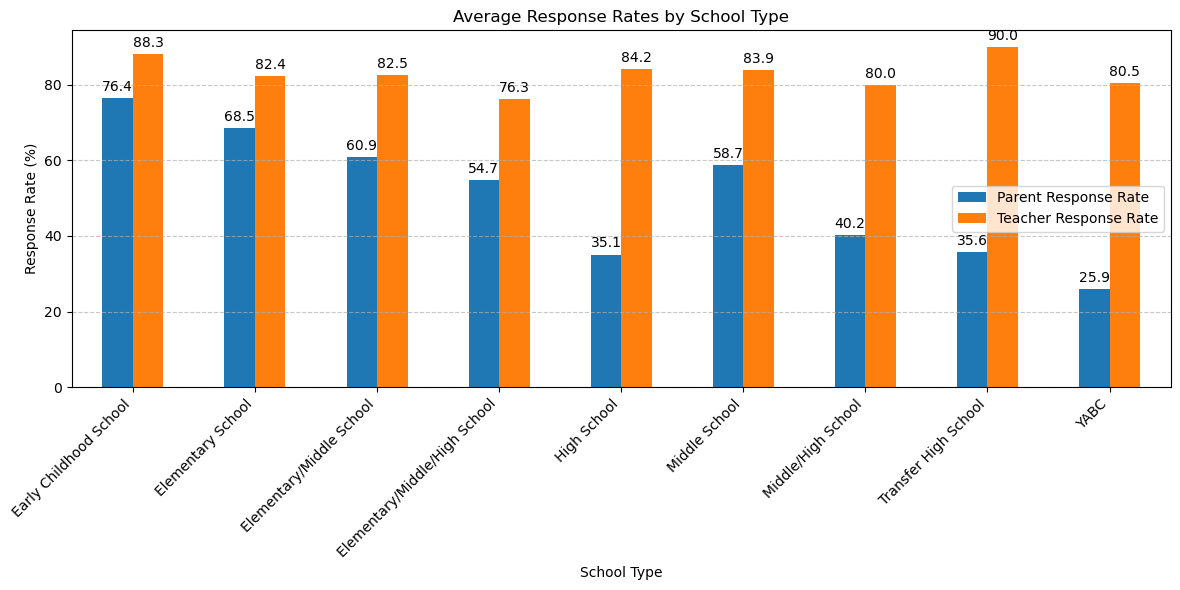

In [175]:
response_stats = db.groupby("School Type")[["Parent Response Rate", "Teacher Response Rate"]].mean().round(2)

ax = response_stats.plot(kind='bar', figsize=(12, 6))
plt.title("Average Response Rates by School Type")
plt.ylabel("Response Rate (%)")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge', padding=3)

plt.tight_layout()
plt.show()


Based on the chart we can find that:

1- Teacher Engagement:
teacher response  arerates are high and  hover around 80–88% .... with very little defferences .... This tells us that teachers are the most engaged group in all schools types

2- Parent Involvement:
In Elementary Schools: parent response is solid (~68.5%), reflecting strong involvement at early education stages
However, starting from Middle Schools, High Schools, Transfer Schools, and YABC, parent response drops alot down to 35.1%, 35.6%, and even 25.9%
This suggests a potential disconnect between families and schools as students progress into higher grades 

so that I recommend boosting parent communication efforts in High Schools and we can do that in many ways ... (workshops for parents, weekly or monthly checkups .... etc)

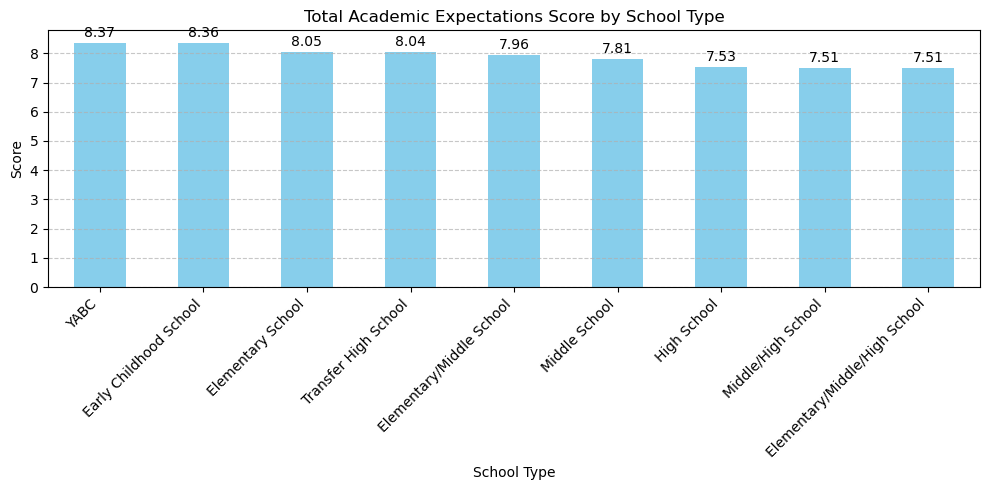

In [200]:
ranking_by_type = db.groupby("School Type")["Total Academic Expectations Score"].mean().sort_values(ascending=False).round(2)

ax3 = ranking_by_type.plot(kind='bar', figsize=(10, 5), color='skyblue')
plt.title("Total Academic Expectations Score by School Type")
plt.ylabel("Score")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, val in enumerate(ranking_by_type):
    ax3.text(i, val + 0.1, f"{val:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

Top 10 Schools by Totla Academic Expectations Score:

In [153]:
db.sort_values("Total Academic Expectations Score", ascending=False)[["School Name", "School Type", "Total Academic Expectations Score"]].head(10)


,School Name,School Type,Total Academic Expectations Score
248,Teachers College Community School,Early Childhood School,9.5
495,P.S. 209,Early Childhood School,9.4
1336,Ps 354,Early Childhood School,9.3
1438,P.S. 005 Huguenot,Elementary School,9.3
1078,P.S. 326,Early Childhood School,9.3
128,Urban Academy Laboratory High School,Transfer High School,9.3
1330,The Academy For Excellence Through The Arts,Early Childhood School,9.3
1624,Riverton Street Charter School,Elementary School,9.3
1164,Voyages Preparatory,Transfer High School,9.2
1527,Williamsburg Collegiate Charter School,Middle School,9.2


Bottom 10 Schools by Overall Score

In [156]:
db.sort_values("Total Academic Expectations Score", ascending=True)[["School Name", "School Type", "Total Academic Expectations Score"]].head(10)

,School Name,School Type,Total Academic Expectations Score
829,The Brooklyn Academy Of Global Finance,High School,5.3
164,Manhattan Theatre Lab High School,High School,5.5
242,Academy For Social Action: A College Board School,Middle/High School,5.8
1342,Queens Metropolitan High School,High School,6.0
392,Banana Kelly High School,High School,6.1
901,Brooklyn Theatre Arts High School,High School,6.1
1605,New York French American Charter School,Early Childhood School,6.1
1669,New York French American Charter School,Early Childhood School,6.1
613,P.S. 044 David C. Farragut,Elementary School,6.1
365,Women'S Academy Of Excellence,High School,6.2


Correlation between response rates and performance

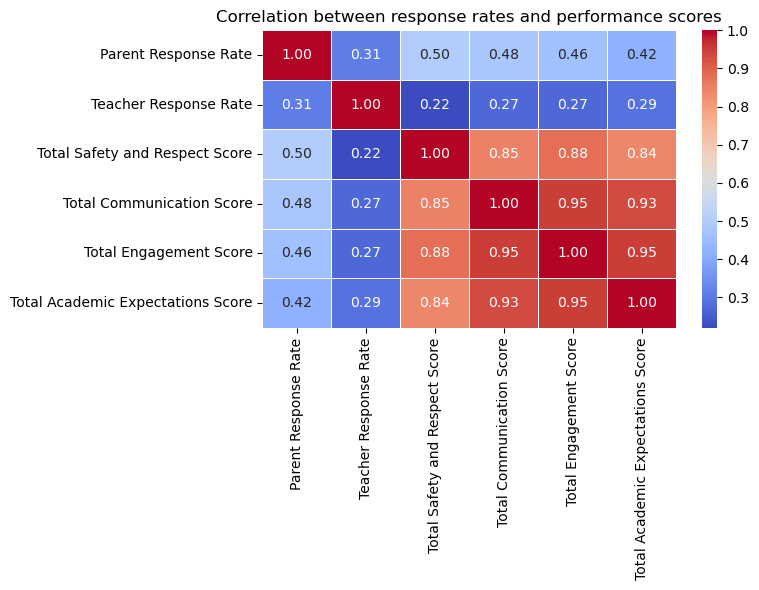

In [198]:
cols_to_check = [
    "Parent Response Rate",
    "Teacher Response Rate",
    "Total Safety and Respect Score",
    "Total Communication Score",
    "Total Engagement Score",
    "Total Academic Expectations Score"
]
corr_matrix = db[cols_to_check].corr().round(2)
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation between response rates and performance scores")
plt.tight_layout()
plt.show()

1. Performance scores are strongly interrelated
2. Parent Response Rate has the strongest impact
   this suggests that when parents are actively engaged, students feel safer, more connected, and have better academic score
3. Teacher Response Rate is weak
   correlations from teacher response rate to performance scores range only from 0.22 to 0.29, their response rate shows little connection to students safety, engagement, or academic expectations.

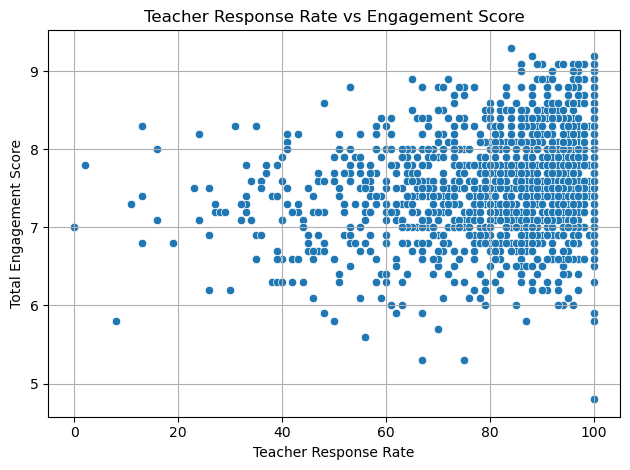

In [173]:
sns.scatterplot(data=db, x="Teacher Response Rate", y="Total Engagement Score")
plt.title("Teacher Response Rate vs Engagement Score")
plt.grid(True)
plt.tight_layout()
plt.show()

Even when teacher response is 100%, the engagement score still ranges from 5.0 to 9.5 
This means a high teacher response rate doesn’t guarantee high engagement

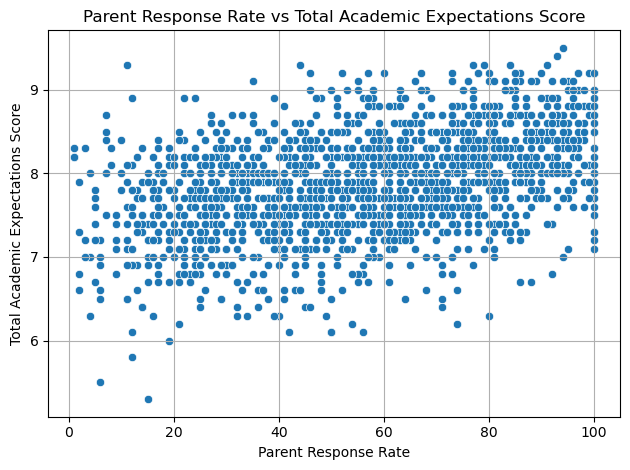

In [169]:
sns.scatterplot(data=db, x="Parent Response Rate", y="Total Academic Expectations Score")
plt.title("Parent Response Rate vs Total Academic Expectations Score")
plt.grid(True)
plt.tight_layout()
plt.show()

this makes sure for us that parents respons rate afftects the academic score of the students .... the higher the parents response rate the higher the academic score expectations

# Recommendations:

1. Involve Parents More

   
   based on the chars we had we found that there is a strong relations between parents response and other scores so this means when parents are involved, schools aim higher and students feel it

   

2. Keep expectations high as students go to higher education levels

   Expectations are strong in early childhood and elementary, but drop in middle and high school so make sure teachers and staff keep encouraging high goals even as school gets harder

   

3. Learn From Top Schools

   Ask them to share what they do differently so others can learn from it.

   


4. Support Middle and High Schools More

   These school types have lower scores than elementary or early childhood, teens need programs to foucus on their emotional health too ... not just the academic score (I highly recommend SEL(Social Emotional Learning) programs)


